# IMERSÃO DADOS ALURA - PROJETO FINAL
## Pedro Henrique Dellamano Laranjeira

## 1- Introdução

Este projeto será baseado nas aulas e discussões apresentadas na Imersão Dados Alura, a respeito da área de drug discovery. Para isso serão utilizadas informações contidas em duas bases de dados:

- Experimentos: dados correspondentes a experimentos com culturas celulares submetidas a diversas drogas em diferentes dosagens e tempos de exposição. Com isso foram obtidos resultados de expressão gênica (https://pt.khanacademy.org/science/biology/gene-expression-central-dogma/central-dogma-transcription/a/intro-to-gene-expression-central-dogma/) e viabilidade celular; (https://pt.wikipedia.org/wiki/Ensaios_de_viabilidade_celular#:~:text=Um%20ensaio%20de%20viabilidade%20celular,sua%20atividade%20qualitativa%20e%20quantitativamente.).

- Resultados: para cada experimento são apresentados os resultados de diversos tipos de Mecânismos de Ação, ou, em inglês, Mechanisms of Action (MoA) (https://en.wikipedia.org/wiki/Mechanism_of_action).

Inicialmente serão realizadas algumas análises com as bases de dados com o objetivo de melhor compreendê-las. Nessa etapa serão verificados os tipos de classificação de tratamento, os tipos de drogas (ou compostos) utilizados, as dosagens utilizadas e os tempos de aplicação. Para essas variáveis serão avaliados os possíveis impactos nas expressões gênicas e nas viabilidades celulares.

Em seguida serão analisadas as correlações entre os dados de expressões gênicas e viabilidades celulares.

Por fim, serão desenvolvidos modelos de machine learning com a tentativa de prever três comportamentos:

Dados os resultados de expressões gênicas e viabilidades celulares de um experimento, é possível prever se ocorre algum mecanismo de ação?
Dados os resultados de expressões gênicas e viabilidades celulares de um experimento, é possível prever se ocorre um mecanismo de ação específico?
Dados os resultados de expressões gênicas de um experimento, é possível prever os dados de viabilidades celulares?

## 2- Importação das bibliotecas utilizadas

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier

## 3- Importação dos dados analisados

In [116]:
url_dados_experimentos = 'https://github.com/phlaranjeira/imersao-dados-desafio-final/blob/main/Dados/dados_experimentos.zip?raw=true'
url_dados_resultados = 'https://github.com/phlaranjeira/imersao-dados-desafio-final/blob/main/Dados/dados_resultados.csv?raw=true'

dados_experimentos = pd.read_csv(url_dados_experimentos, compression = 'zip')
dados_resultados = pd.read_csv(url_dados_resultados)

## 4- Análise geral dos dados

O primeiro passo será avaliar as informações disponíveis em cada base de dados: quantidade de experimentos, quantidade de drogas utilizadas, informações sobre as doses aplicadas e tempo de exposição, entre outras

In [117]:
#visualização da tabela de experimentos
dados_experimentos

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,...,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,...,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,...,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,...,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740


Há dados de 23814 experimentos, identificados por códigos únicos de id. Para cada id são informados o tratamento utilizados, o tempo de exposição, a dose aplicada, a droga utilizada e informações das expressões gênicas e viabilidades celulares obtidas.

Tratamento:
['com_droga' 'com_controle']

Os tratamentos estão classificados entre "com_droga" e "com_controle".
Em todo experimento é necessário haver um grupo de controle, sem interferências, para que haja parâmetro de comparação 
com os resultados obtidos quando aplicadas as variáveis estudadas.


Distribuição dos experimentos por tipo de tratamento:
com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64
com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64


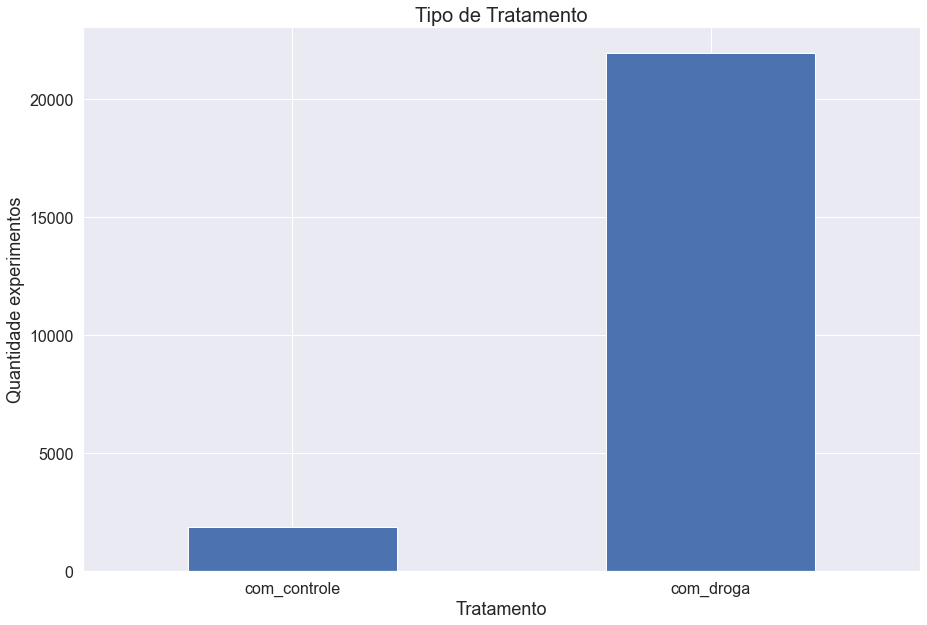

In [118]:
#detalhamento das informações da coluna tratamento

print('Tratamento:')
print(dados_experimentos['tratamento'].unique())
print('\nOs tratamentos estão classificados entre "com_droga" e "com_controle".\nEm todo experimento é necessário haver um grupo de controle, sem interferências, para que haja parâmetro de comparação \ncom os resultados obtidos quando aplicadas as variáveis estudadas.\n\n')
print('Distribuição dos experimentos por tipo de tratamento:')
print(dados_experimentos['tratamento'].value_counts(normalize = True))
print(dados_experimentos['tratamento'].value_counts())

plt.figure(figsize=(15, 10))
valores_tratamento = dados_experimentos['tratamento'].value_counts(ascending=True)
ax = valores_tratamento.sort_index().plot.bar()
ax.set_title('Tipo de Tratamento', fontsize=20)
ax.set_xlabel('Tratamento', fontsize=18)
ax.set_ylabel('Quantidade experimentos', fontsize=18)
plt.xticks(rotation = 0, fontsize=16)
plt.yticks(fontsize=16)
plt.show()

Tempo:
[24 72 48]

Os experimentos foram realizados com tempos de 24, 48 e 72, provavelmente expressos em horas. Ou seja, 1, 2 ou 3 dias.


Distribuição dos experimentos por tempo de tratamento:
48    0.346435
72    0.327202
24    0.326363
Name: tempo, dtype: float64


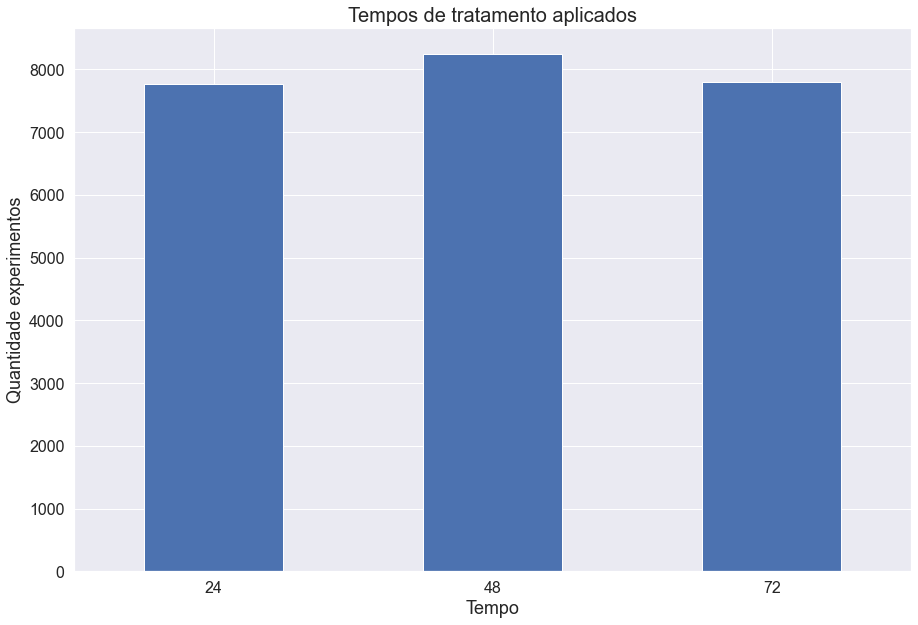

In [119]:
#detalhamento das informações da coluna tempo

print('Tempo:')
print(dados_experimentos['tempo'].unique())
print('\nOs experimentos foram realizados com tempos de 24, 48 e 72, provavelmente expressos em horas. Ou seja, 1, 2 ou 3 dias.\n\n')
print('Distribuição dos experimentos por tempo de tratamento:')
print(dados_experimentos['tempo'].value_counts(normalize = True))

plt.figure(figsize=(15, 10))
valores_tempo = dados_experimentos['tempo'].value_counts(ascending=True)
ax = valores_tempo.sort_index().plot.bar()
ax.set_title('Tempos de tratamento aplicados', fontsize=20)
ax.set_xlabel('Tempo', fontsize=18)
ax.set_ylabel('Quantidade experimentos', fontsize=18)
plt.xticks(rotation = 0, fontsize=16)
plt.yticks(fontsize=16)
plt.show()


Dose:
['D1' 'D2']

Os experimentos foram realizados com apenas duas dosagens: D1 e D2.


Distribuição dos experimentos por dose:
D1    0.510078
D2    0.489922
Name: dose, dtype: float64


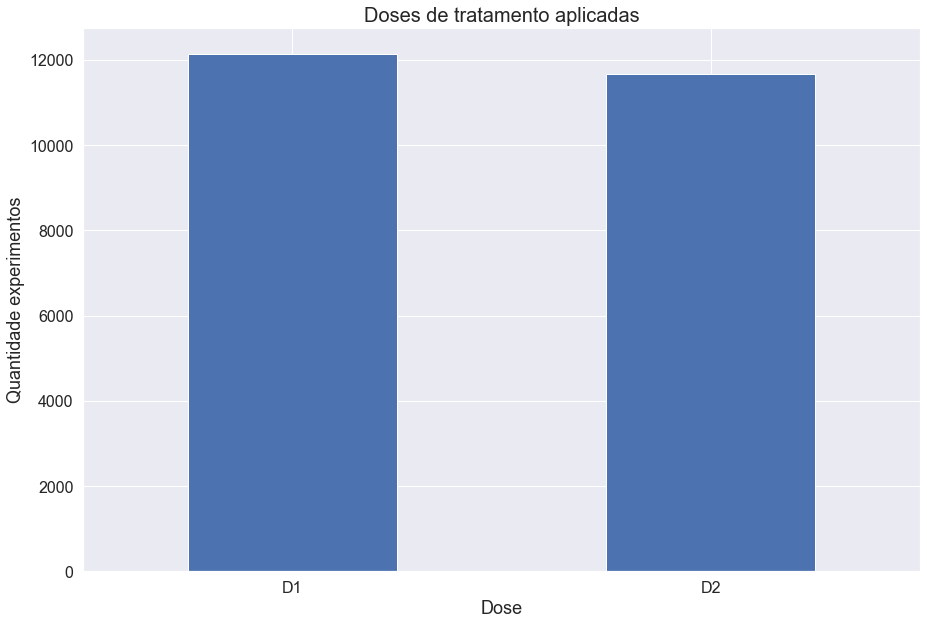

In [120]:
#detalhamento das informações da coluna dose
print('Dose:')
print(dados_experimentos['dose'].unique())
print('\nOs experimentos foram realizados com apenas duas dosagens: D1 e D2.\n\n')
print('Distribuição dos experimentos por dose:')
print(dados_experimentos['dose'].value_counts(normalize = True))

plt.figure(figsize=(15, 10))
valores_dose = dados_experimentos['dose'].value_counts(ascending=True)
ax = valores_dose.sort_index().plot.bar()
ax.set_title('Doses de tratamento aplicadas', fontsize=20)
ax.set_xlabel('Dose', fontsize=18)
ax.set_ylabel('Quantidade experimentos', fontsize=18)
plt.xticks(rotation = 0, fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [121]:
#detalhamento das informações da coluna droga
print('Droga:')
print(dados_experimentos['droga'].unique())

Droga:
['b68db1d53' 'df89a8e5a' '18bb41b2c' ... '573c787a2' 'b2fe3eca7'
 'dd4a96d16']


Foram utilizadas 3289 tipos de drogas nos experimentos

Droga mais utilizada:
Index(['cacb2b860'], dtype='object')

A droga mais utilizada foi 'cacb2b860', com 1866 experimentos

As cinco drogas mais utilizadas nos experimentos foram:


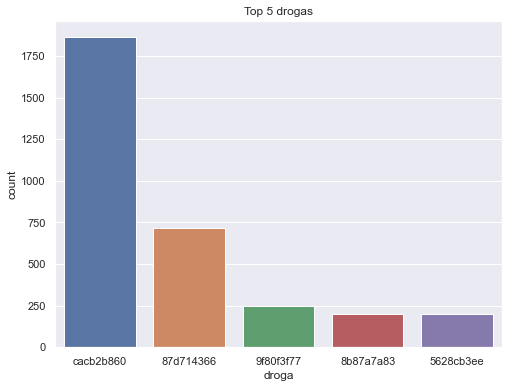


Drogas utilizadas em apenas um experimento:
False    3160
True      129
Name: droga, dtype: int64

Há 129 drogas que foram utilizadas em apenas um experimento cada.


In [122]:
print("Foram utilizadas {} tipos de drogas nos experimentos\n".format(dados_experimentos['droga'].nunique()))

print('Droga mais utilizada:')
print(dados_experimentos['droga'].value_counts().index[0:1])
maior_droga = dados_experimentos.query('droga == "cacb2b860"')
maior_droga = maior_droga['droga'].value_counts().sum()
print("\nA droga mais utilizada foi 'cacb2b860', com {} experimentos\n".format(maior_droga))

print('As cinco drogas mais utilizadas nos experimentos foram:')
maiores_drogas = dados_experimentos['droga'].value_counts().index[0:5]

sns.set()
plt.figure(figsize=(8, 6))
ax = sns.countplot(x = 'droga', data=dados_experimentos.query('droga in @maiores_drogas'), order=maiores_drogas)
ax.set_title('Top 5 drogas')
plt.show()

print('\nDrogas utilizadas em apenas um experimento:')
drogas_um_experimento = dados_experimentos['droga'].value_counts() == 1
print(drogas_um_experimento.value_counts())
print('\nHá 129 drogas que foram utilizadas em apenas um experimento cada.')

Observa-se que a quantidade de experimentos com a droga cacb2c860 coincide com o númer de experimentos com controle. Pode-se verificar se há essa correspondência.

In [123]:
print('Drogas presentes nos experimentos com controle:')
print(dados_experimentos.query('tratamento == "com_controle"')['droga'].unique())
#printdados_controle['droga'].unique()

Drogas presentes nos experimentos com controle:
['cacb2b860']


In [124]:
#estudo das expressões gênicas e viabilidades celulares
dados_experimentos.loc[:,'g-0':'g-771'].describe()

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,...,g-762,g-763,g-764,g-765,g-766,g-767,g-768,g-769,g-770,g-771
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,0.119905,...,0.207299,0.009161,0.171027,0.002316,-0.209799,-0.076251,0.134162,-0.128018,-0.219210,0.101524
std,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,1.087180,...,1.096488,1.200395,1.357701,1.052771,1.201918,1.115477,0.951264,1.230636,1.326193,1.417674
min,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,...,-8.193000,-10.000000,-9.795000,-8.180000,-10.000000,-10.000000,-4.269000,-10.000000,-10.000000,-10.000000
25%,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,-0.360200,...,-0.433875,-0.502250,-0.537075,-0.508775,-0.606175,-0.506200,-0.353100,-0.544600,-0.554400,-0.523800
50%,-0.008850,-0.046600,0.075200,0.008050,-0.026900,-0.015650,-0.000650,-0.017900,0.010000,0.160450,...,0.059600,-0.005900,-0.013600,-0.027700,-0.011850,0.009900,0.005400,0.000600,0.028700,-0.006500
75%,0.525700,0.403075,0.663925,0.463400,0.465375,0.510425,0.528725,0.411900,0.549225,0.697775,...,0.648500,0.492150,0.522500,0.457000,0.483000,0.511175,0.409075,0.498500,0.496400,0.536950
max,10.000000,5.039000,8.257000,10.000000,10.000000,7.282000,7.333000,5.473000,8.887000,6.433000,...,10.000000,9.552000,10.000000,8.346000,5.444000,6.317000,10.000000,5.911000,10.000000,10.000000


In [125]:
dados_experimentos.loc[:,'c-0':'c-99'].describe()

,c-0,c-1,c-2,c-3,c-4,c-5,c-6,c-7,c-8,c-9,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,-0.355156,-0.455359,-0.480542,-0.377666,-0.493552,-0.446037,-0.574855,-0.266293,-0.451307,-0.458664,...,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,1.752565,2.004962,2.039346,1.554583,2.091888,1.893484,2.234152,1.465313,1.948829,1.646122,...,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,-0.549300,-0.538425,-0.550375,-0.601975,-0.559975,-0.578775,-0.571250,-0.524275,-0.551100,-0.654675,...,-0.566175,-0.565975,-0.589975,-0.568700,-0.563775,-0.567975,-0.552575,-0.561000,-0.592600,-0.562900
50%,-0.009000,0.009800,-0.004000,-0.039050,0.011400,-0.008900,0.007400,0.006350,-0.005350,-0.025350,...,-0.009900,0.003250,-0.009100,-0.013750,-0.003300,-0.010250,-0.001250,-0.006800,0.014000,-0.019500
75%,0.448975,0.476875,0.460575,0.413100,0.470300,0.442675,0.459475,0.469375,0.453175,0.424400,...,0.457750,0.461500,0.445675,0.452900,0.470900,0.444750,0.465225,0.446400,0.461275,0.438650
max,3.365000,3.915000,2.970000,2.408000,4.555000,3.614000,3.904000,4.918000,3.648000,3.194000,...,4.069000,3.960000,3.927000,3.596000,3.747000,2.814000,3.505000,2.924000,3.111000,3.805000


Observa-se que os valores estão normalizados em uma base que varia de -10 a +10. A seguir, apresenta-se alguns estudos com a distribuição de algumas características dos valores de expressão gênica.

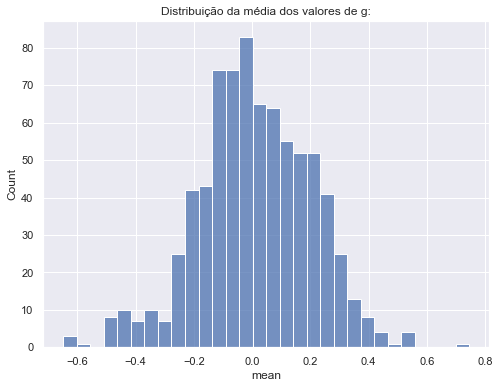

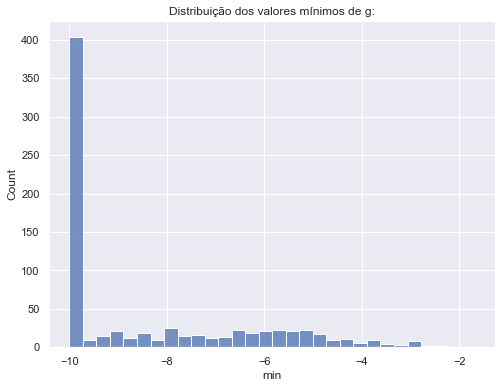

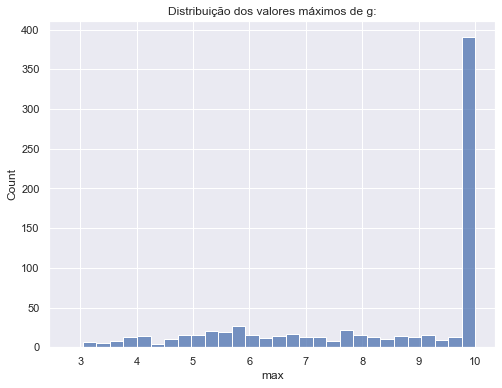

Há muitas ocorrências de expressões gênicas com os valores máximos e mínimos normalizados


In [166]:
plt.figure(figsize=(8, 6))
ax = sns.histplot(data=dados_experimentos.loc[:,'g-0':'g-771'].describe().T['mean'],bins=30, palette = 'crest')
ax.set_title('Distribuição da média dos valores de g:')
plt.show()

plt.figure(figsize=(8, 6))
ax = sns.histplot(data=dados_experimentos.loc[:,'g-0':'g-771'].describe().T['min'],bins=30, palette = 'crest')
ax.set_title('Distribuição dos valores mínimos de g:')
plt.show()

plt.figure(figsize=(8, 6))
ax = sns.histplot(data=dados_experimentos.loc[:,'g-0':'g-771'].describe().T['max'],bins=30, palette = 'crest')
ax.set_title('Distribuição dos valores máximos de g:')
plt.show()

print('Há muitas ocorrências de expressões gênicas com os valores máximos e mínimos normalizados')

In [148]:
#estudo da tabela de resultados
dados_resultados

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23810,id_fffb70c0c,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23811,id_fffc1c3f4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23812,id_fffcb9e7c,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


A tabela apresenta os resultados para 206 mecanismos de ação para os mesmos 23814 experimentos.

Para verificar os valores para os mecanismos de ação:

In [149]:
dados_resultados.describe()

,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,0.000714,0.000756,0.001008,0.007979,0.012640,0.003065,0.002268,0.004031,0.000504,0.011338,...,0.000252,0.001050,0.002016,0.013270,0.003065,0.000252,0.007139,0.001092,0.001638,0.001260
std,0.026709,0.027483,0.031731,0.088967,0.111716,0.055283,0.047566,0.063365,0.022443,0.105876,...,0.015871,0.032384,0.044851,0.114429,0.055283,0.015871,0.084190,0.033025,0.040436,0.035472
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [150]:
dados_resultados['acat_inhibitor'].unique()

array([0, 1], dtype=int64)

Os valores dos mecanismos de ação (MoA) são binários, 1 ou 0, indicando sua ativação ou não. Para facilitar a análise serão adicionadas duas colunas: ativacao_moa indicando se o experimento ativou algum MoA e n_moa indicando a quantidade de MoAs ativados.

Na sequencia será criada uma tabela adicionando essas colunas criadas à base de dados experimentos, chamando-a de dados_combinados.

In [152]:
dados_resultados['n_moa'] = dados_resultados.drop('id', axis=1).sum(axis=1)
dados_resultados['ativo_moa'] = (dados_resultados['n_moa'] != 0)

dados_combinados = pd.merge(dados_experimentos, dados_resultados[['id','n_moa', 'ativo_moa']], on='id')

## 5- Análise de algumas relações entre os dados experimentais

In [127]:
pd.crosstab([dados_experimentos['dose'], dados_experimentos['tempo']],  dados_experimentos['tratamento'])

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [128]:
pd.crosstab([dados_experimentos['dose'], dados_experimentos['tempo']],  dados_experimentos['tratamento'], normalize='index')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

In [129]:
pd.crosstab([dados_experimentos['dose'], dados_experimentos['tempo']],  dados_experimentos['tratamento'], normalize='columns')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

Observa-se que as distribuições dos experimentos é bastante uniforme quando separados por dose e tempo, para qualquer dos dois tratamento.

Outra análise a ser realizada é confirmar se o grupo de controle não ativou qualquer MoA, o que realmente ocorre, e a quantidade de experimentos com droga que ativa ao menos um MoA que é de .

In [153]:
dados_combinados.query('tratamento == "com_controle"' )['ativo_moa'].value_counts()

False    1866
Name: ativo_moa, dtype: int64

In [154]:
dados_combinados.query('tratamento == "com_droga"' )['ativo_moa'].value_counts()

True     14447
False     7501
Name: ativo_moa, dtype: int64

In [ ]:
Pode-se verificar também quais os mecanismos de ação mais ativados:

In [156]:
print(dados_resultados.drop(['id', 'n_moa', 'ativo_moa'], axis=1).sum().sort_values(ascending=False))


nfkb_inhibitor                                832
proteasome_inhibitor                          726
cyclooxygenase_inhibitor                      435
dopamine_receptor_antagonist                  424
serotonin_receptor_antagonist                 404
                                             ... 
protein_phosphatase_inhibitor                   6
autotaxin_inhibitor                             6
diuretic                                        6
erbb2_inhibitor                                 1
atp-sensitive_potassium_channel_antagonist      1
Length: 206, dtype: int64


Também pode-se analisar as relações de dose e tempo para duas drogas de exemplo para verificar suas influências: 

<AxesSubplot:title={'center':'D2'}, xlabel='droga', ylabel='g-0'>

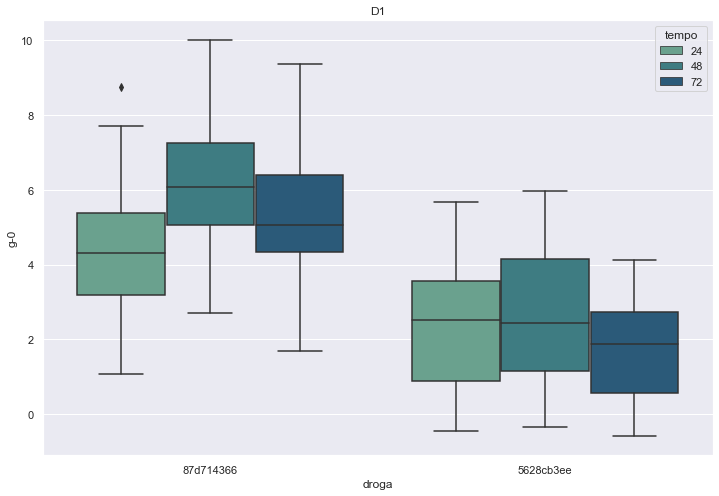

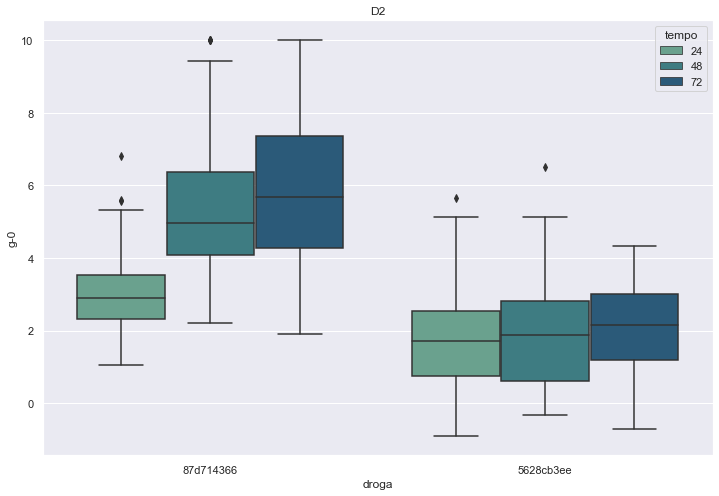

In [163]:
drogas_estudadas = {'5628cb3ee', '87d714366'}
plt.figure(figsize=(12,8))
plt.title("D1")
sns.boxplot(data = dados_combinados.query('droga in @drogas_estudadas & dose == "D1"'), palette = 'crest', y= 'g-0', x='droga', hue='tempo')

plt.figure(figsize=(12,8))
plt.title("D2")
sns.boxplot(data = dados_combinados.query('droga in @drogas_estudadas & dose == "D2"'), palette = 'crest', y= 'g-0', x='droga', hue='tempo')


Observa-se que pode haver significtiva influência das doses e tempos de apliicação nas expressões gênicas.

Também pode-se verificar se há alguma droga que, dependendo da configuração do experimento, ativa ou não ativa algum MOA. Ou se alguma droga que, dependendo da configuração do experimento, ativa MOAs diferentes.

In [160]:
nomes_droga = dados_combinados['droga'].unique()

depende = 0
for nome in nomes_droga:
    i = 0
    ativo = "Zero"
    nao_ativo = "Zero"
    dados_nome = dados_combinados.query('droga == @nome')
    dados_nome.reset_index(drop=True, inplace=True)
    tamanho = len(dados_nome)
    while i < tamanho:
        if dados_nome.loc[i, 'n_moa'] > 0:
            ativo = "Sim"
        else:
            nao_ativo = "Sim"
        i = i + 1
        if ativo == nao_ativo:
            print("{}: Depende".format(nome))
            i = tamanho
            depende = depende + 1
if depende == 0:
    print("Nenhuma ativação depende da configuração do experimento")

Nenhuma ativação depende da configuração do experimento


In [161]:
nomes_composto = dados_combinados['droga'].unique()
depende = 0

for nome in nomes_droga:
    i = 0
    n_moa = 0
    n_moa_2 = 0
    dados_nome = dados_combinados.query('droga == @nome')
    dados_nome.reset_index(drop=True, inplace=True)
    tamanho = len(dados_nome)
    while i < tamanho & tamanho > 1:
        if dados_nome.loc[i, 'n_moa'] > 0:
            if n_moa == 0:
                n_moa = dados_nome.loc[i, 'n_moa']
            else:
                n_moa_2 = dados_nome.loc[i, 'n_moa']
        i = i + 1
    if n_moa != n_moa_2:
        print("{}: Depende".format(nome))
        depende = depende + 1
if depende == 0:
    print("As ativações não dependem da configuração do experimento")

As ativações não dependem da configuração do experimento


## 6 - Análise de correlação entre os dados de expressões gênicas e viabilidades celulares

Estudo da correlação entre os valores de expressão gênica, para os 100 primeiros genes para simplificar a análise:

<AxesSubplot:title={'center':'Correlação entre os valores de g:'}>

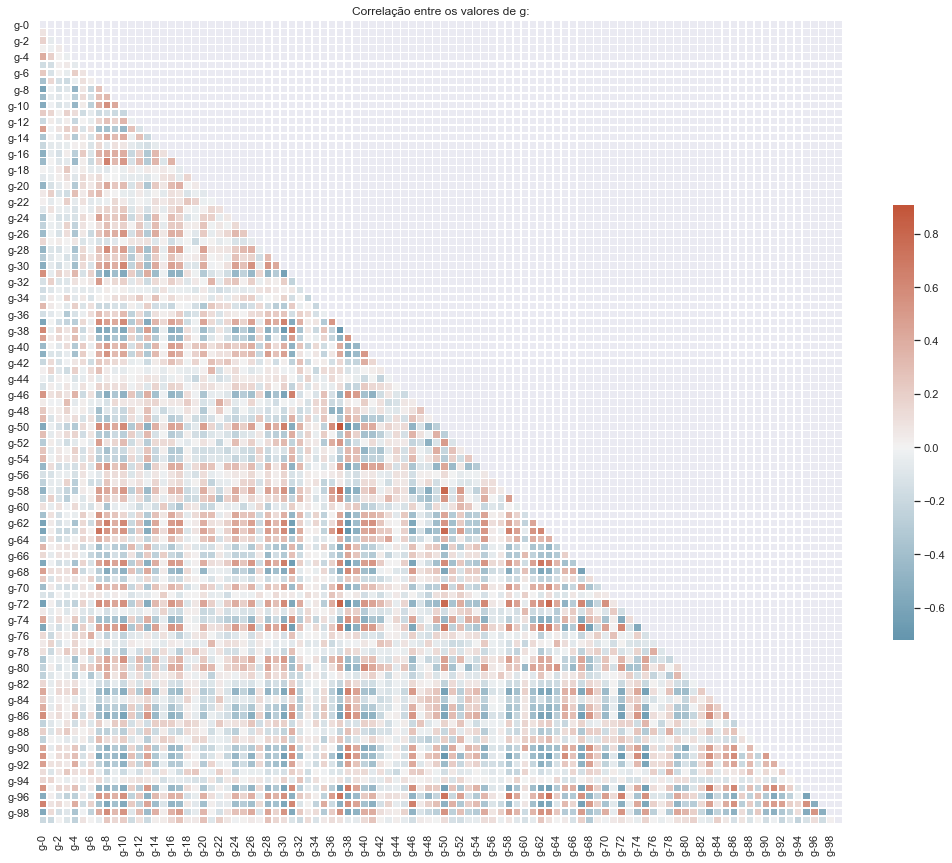

In [140]:
corr_g = dados_experimentos.loc[:,'g-0':'g-99'].corr()

# Plotagem do gráfico
mask = np.triu(np.ones_like(corr_g, dtype=bool))
f, ax = plt.subplots(figsize=(18, 16))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
ax.set_title('Correlação entre os valores de g:')
sns.heatmap(corr_g, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.4, cbar_kws={"shrink": .5})

Nota-se que as correlações

Estudo da correlação entre os valores de viabilidade celular:

<AxesSubplot:title={'center':'Correlação entre os valores de c:'}>

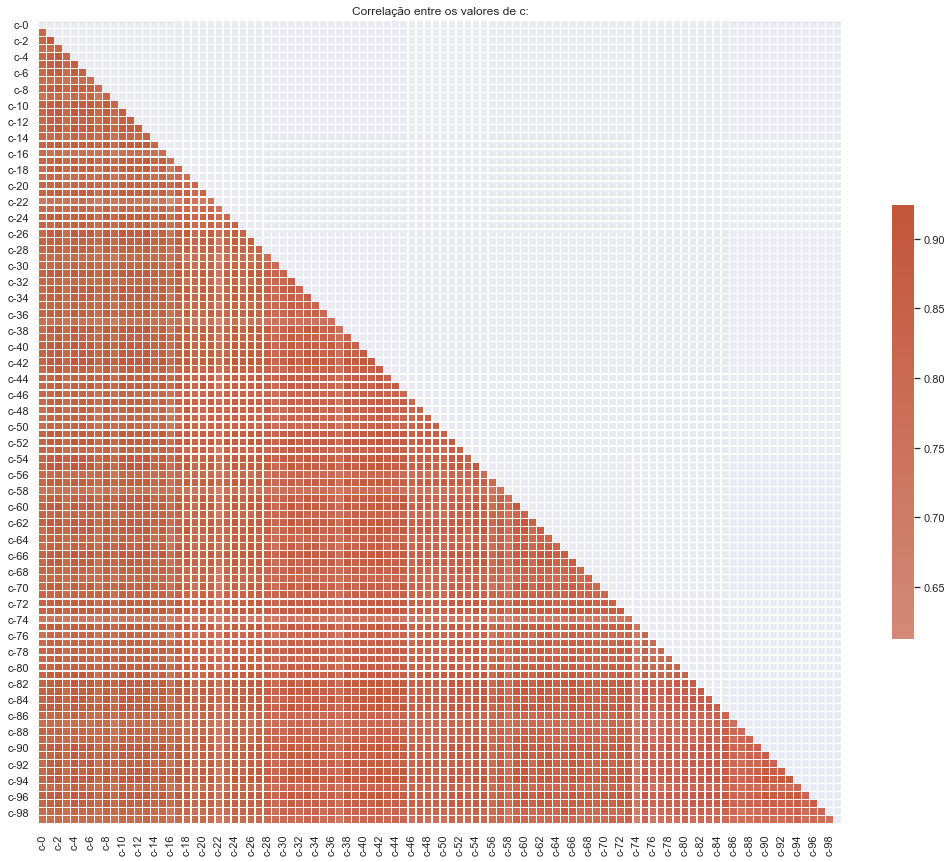

In [143]:
corr_c = dados_experimentos.loc[:,'c-0':'c-99'].corr()

# Plotagem do gráfico
mask = np.triu(np.ones_like(corr_c, dtype=bool))
f, ax = plt.subplots(figsize=(18, 16))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
ax.set_title('Correlação entre os valores de c:')
sns.heatmap(corr_c, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.4, cbar_kws={"shrink": .5})

Para os valores de viabilidade celular (c), as correlações são bastante significativas.

Agora será estudada a correlação entre as expressões gênicas e a viabilidade celular para todos os valores:

<AxesSubplot:title={'center':'Correlação entre os valores de g e c:'}>

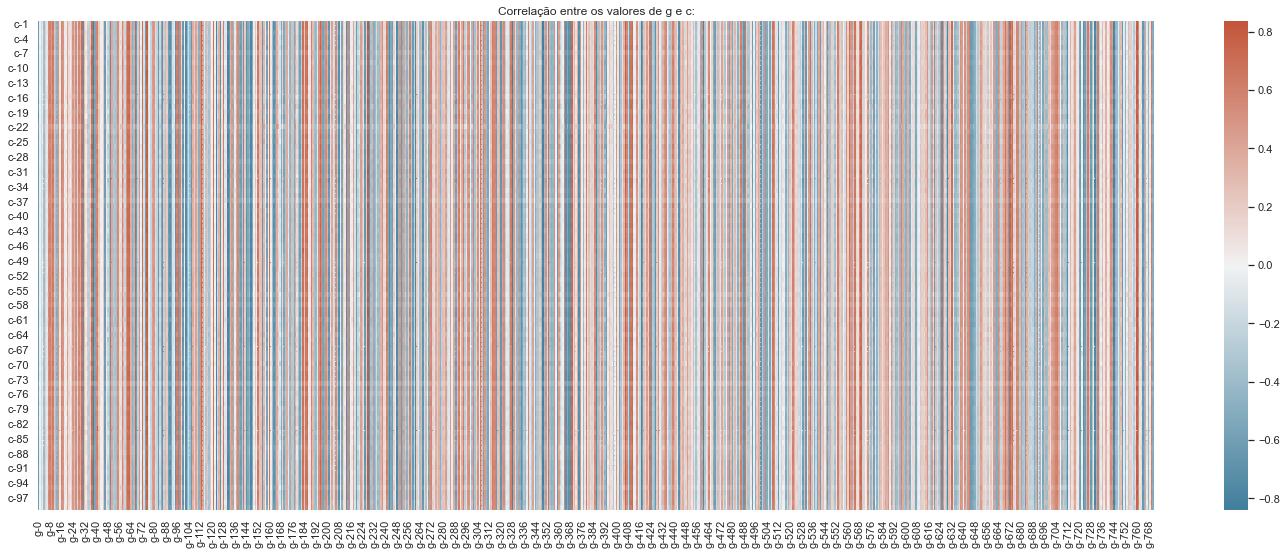

In [144]:
corr_celular_gen = dados_experimentos.loc[:,'g-0':'c-99'].corr()
corr_celular_gen = corr_celular_gen.loc['c-1':'c-99','g-0':'g-771']
corr_celular_gen

f, ax = plt.subplots(figsize=(25, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
ax.set_title('Correlação entre os valores de g e c:')
sns.heatmap(corr_celular_gen, cmap=cmap, center=0)

Há fortes correlações positivas e negativas entre algumas expressões gênicas e viabilidades celulares. Porém, também há correlações bastante fracas.



## 7- Modelos de machine learning para o questionamento 1

O questionamento 1 é: dados os resultados de expressões gênicas e viabilidades celulares de um experimento, é possível prever se ocorre algum mecanismo de ação?

Para isso, serão desenvolvidos três tipos de modelos de machine learning: regressão logística, classificação SGD e classificação por árvore de decisão. Os resultados serão comparados a um modelo dummy, para verificar suas eficácias. Esses modelos também serão utilizados para os questionamentos 2 e 3.

In [180]:
x = dados_combinados.loc[:,'g-0':'c-99']
y = dados_combinados['ativo_moa'] 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=231)

#modelo regressão logística
modelo_rlogistica = LogisticRegression(max_iter=1000)
modelo_rlogistica.fit(x_treino, y_treino)
resultado_rlogistica = modelo_rlogistica.score(x_teste, y_teste)
print("\nScore modelo de regressão logística: {}\n".format(resultado_rlogistica))


#modelo classificação SGD
modelo_sgd = SGDClassifier()
modelo_sgd.fit(x_treino, y_treino)
resultado_sgd = modelo_sgd.score(x_teste, y_teste)
print("Score modelo SGD: {}\n".format(resultado_sgd))


#modelo classificação por árvore de decisão
modelo_arvore = DecisionTreeClassifier(max_depth = 3)
modelo_arvore.fit(x_treino, y_treino)
resultado_arvore = modelo_arvore.score(x_teste, y_teste)
print("Score modelo de árvore de decisão: {}\n".format(resultado_arvore))

#modelo dummy para comparação
modelo_dummy = DummyClassifier("most_frequent")
modelo_dummy.fit(x_treino, y_treino)
previsao_dummy = modelo_dummy.predict(x_teste)
resultado_dummy = accuracy_score(y_teste, previsao_dummy)
print("Score modelo dummy: {}\n".format(resultado_dummy))


Score modelo de regressão logística: 0.6327944572748267

Score modelo SGD: 0.5866050808314087

Score modelo de árvore de decisão: 0.6067604450976275

Score modelo dummy: 0.6067604450976275



C:\Users\phlar\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass strategy=most_frequent as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Observa-se que os modelos apresentam resultados muito similares e com eficácia relativamente baixa, entre 58 e 63%.
Portanto, os modelos de machine learning propostos não são recomendados para definir se há ativação de algum MoA a partir dos valores de g e c do experimento.

## 8- Modelos de machine learning para o questionamento 2

O questionamento 2 é: dados os resultados de expressões gênicas e viabilidades celulares de um experimento, é possível prever se ocorre um mecanismo de ação específico?

Para isso será utilizado como exemplo o MOA nfkb_inhibitor, por ser o que apresenta mais ativações. Aplicando-se os mesmos modelos de machine learning:

In [181]:
dados_combinados_nfkb = pd.merge(dados_combinados, dados_resultados[['id','nfkb_inhibitor']], on='id')
dados_combinados_nfkb['nfkb_inhibitor']

x = dados_combinados_nfkb.select_dtypes('float64')
y = dados_combinados_nfkb['nfkb_inhibitor'] 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=231)


#modelo regressão logística
modelo_rlogistica = LogisticRegression(max_iter=1000)
modelo_rlogistica.fit(x_treino, y_treino)
resultado_rlogistica = modelo_rlogistica.score(x_teste, y_teste)
print("\nScore modelo de regressão logística: {}\n".format(resultado_rlogistica))


#modelo classificação SGD
modelo_sgd = SGDClassifier()
modelo_sgd.fit(x_treino, y_treino)
resultado_sgd = modelo_sgd.score(x_teste, y_teste)
print("Score modelo SGD: {}\n".format(resultado_sgd))


#modelo classificação por árvore de decisão
modelo_arvore = DecisionTreeClassifier(max_depth = 3)
modelo_arvore.fit(x_treino, y_treino)
resultado_arvore = modelo_arvore.score(x_teste, y_teste)
print("Score modelo de árvore de decisão: {}\n".format(resultado_arvore))

#modelo dummy para comparação
modelo_dummy = DummyClassifier("most_frequent")
modelo_dummy.fit(x_treino, y_treino)
previsao_dummy = modelo_dummy.predict(x_teste)
resultado_dummy = accuracy_score(y_teste, previsao_dummy)
print("Score modelo dummy: {}\n".format(resultado_dummy))


Score modelo de regressão logística: 0.9897123661557842

Score modelo SGD: 0.9890825110224648

Score modelo de árvore de decisão: 0.9951711106445518

Score modelo dummy: 0.96514801595633



C:\Users\phlar\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass strategy=most_frequent as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Como há poucos experimentos que ativam o MoA, os três modelos apresentam boa eficácia, próxima a 99%, porém pouco acima do modelo dummy, que tem eficiência de 96,5%.

Assim, os modelos até podem definir se há ativação de um MoA específico a partir dos valores de g e c do experimento, sendo que para isso os resultados deveriam ser analisados previamente por especialistas.

## 9- Conclusões

Há uma quantidade de informações significativa nos dados estudados, permitindo aprofundamento nas análises conforme a disponibilidade do analista. Este estudo não se aprofundou em muitas análises, limitando-se às mais simples e diretas.

Pelas análises, pode-se perceber que os valores medidos para as expressões gênicas (g) e viabilidade celular (c) dependem das doses e tempos de aplicação para cada droga aplicada.

Cada droga testada é capaz de ativar um determinado número de MoAs, independentemente da configuração do experimento, ou seja, da dose utilizada e do tempo de exposição.

Pode-se afirmar que os modelos de machine learning propostos para determinar se há ativação de algum MoA a partir dos dados de g e c não são aplicáveis, por apresentarem eficácia relativamente baixa.

Já os modelos que pretendem prever a ativação de um MoA específico apresentam resultados melhores, porém, dada a pequena quantidade de ativações frente ao número de experimentos, sua eficácia deve ser confirmada ou não por especialistas na área.

Por fim, deixa-se alguns questionamentos para possíveis análises futuras, não realizadas pela limitação do escopo deste estudo:
- é possível propor um modelo de machine learning eficaz para prever os valores de viabilidade celular (c) a partir dos valores de expressão gênica (g)?
- para outros MoAs é possível replicar o modelo proposto para o nfkb_inhibitor?
- há modelos capazes de prever um tipo de MoA (inibidor, agonista, antagonista, ...) a partir dos dados de g e c?